In [1]:
import pandas as pd
import seaborn as sns
import rho_plus as rp
from baysic.utils import quick_view, json_to_df
IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)

No module named 'phonopy'


/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from pathlib import Path
run_id = Path('logs') / '09-29' / '5'

df = json_to_df(run_id / 'total.json')
df.head()

,sg_symbol,symm,conv,scale,wyckoffs,prop_generated,avg_num_successful,prop_actual_success,best_struct,best_gen_e_form,...,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct
0,Im-3,"[[ 2.272823 2.272823 -2.272823] Co, [-2.27282...","[[2.272823 2.272823 6.818469] Co, [6.818469 2....",2.0,4c_1a_12g,0.103448,0.574713,1.0,"[[0. 0. 0.] Ni, [3.99605203 3.99605203 3.99605...",[[[-1.20902638e-07 -4.18159469e-08 -5.09063730...,...,mp-1106327,Co4NiSb2,17,204,3,Co Ni Sb,Cubic,template-based_ternary,0,"[[ 2.272823 2.272823 -2.272823] Co, [-2.27282..."
1,Im-3,"[[0. 0. 0.] Pr, [0. 3.77617 0. ] Cu, ...","[[0. 0. 0.] Pr, [3.77617 3.77617 3.77617] Pr, ...",2.0,1a_3b_4c_12g,0.054054,0.702703,1.0,"[[0. 3.99329114 3.99329114] Cu, [3.993...",[[[-1.05681682e-08 3.76298823e+00 3.76298810...,...,mp-1105109,PrCu3Ru4O2,20,204,4,Cu O Pr Ru,Cubic,template-based_quartenary,1,"[[0. 0. 0.] Pr, [0. 3.77617 0. ] Cu, ..."
2,Im-3,"[[0. 0. 0.] La, [ 1.8600665 -1.8637325 -1.8631...","[[0. 0. 0.] La, [3.72461283 3.72461283 3.72461...",2.0,1a_4c_3b_12g,0.070000,1.050000,1.0,"[[1.6969322 5.09079659 5.09079659] Cu, [5.090...","[[[1.87121038 5.61363105 5.61363163] Cu, [5.61...",...,mp-1106068,LaCr4Cu3O2,20,204,4,Cr Cu La O,Cubic,template-based_quartenary,1,"[[0. 0. 0.] La, [ 1.8600665 -1.8637325 -1.8631..."
3,Im-3,"[[0. 0. 0.] Ho, [ 1.8650475 1.8650475 -1.8650...","[[0. 0. 0.] Ho, [3.730095 3.730095 3.730095] H...",2.0,1a_4c_3b_12g,0.054054,0.716216,1.0,"[[1.73952472 5.21857417 5.21857417] Cu, [5.218...","[[[1.86501155 5.59503545 5.59503472] Cu, [5.59...",...,mp-1106004,HoFe4Cu3O2,20,204,4,Cu Fe Ho O,Cubic,template-based_quartenary,1,"[[0. 0. 0.] Ho, [ 1.8650475 1.8650475 -1.8650..."
4,Im-3,"[[0. 0. 0.] Ca, [0. 0. 3.808434] C...","[[0. 0. 0.] Ca, [3.808434 3.808434 3.808434] C...",2.0,1a_3b_4c_12g,0.068966,0.586207,1.0,"[[1.72377694 5.17133081 5.17133081] Cu, [5.171...","[[[1.8937715 5.68131469 5.68131447] Cu, [5.68...",...,mp-1106325,CaCu3Pt4O2,20,204,4,Ca Cu O Pt,Cubic,template-based_quartenary,1,"[[0. 0. 0.] Ca, [0. 0. 3.808434] C..."


In [21]:
df['matches'] = [int(row['conv'].matches(row['best_relaxed'])) for i, row in df.iterrows()]

In [22]:
df.describe().round(3)

,scale,prop_generated,avg_num_successful,prop_actual_success,true_e_form,nsites,spacegroup,nelements,nontrivial_coordinates,best_e_form,best_nsite,matches
count,10.000,10.000,10.000,10.0,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,1.900,0.101,1.176,1.0,-6.118,21.500,210.100,3.600,2.000,-241.057,39.200,0.900
std,0.316,0.054,0.824,0.0,1.112,5.874,7.923,0.516,2.108,49.642,1.932,0.316
min,1.000,0.054,0.575,1.0,-8.157,17.000,204.000,3.000,0.000,-326.931,34.000,0.000
25%,2.000,0.065,0.683,1.0,-6.878,20.000,204.000,3.000,1.000,-275.593,40.000,1.000
50%,2.000,0.072,0.709,1.0,-6.057,20.000,204.000,4.000,1.000,-242.780,40.000,1.000
75%,2.000,0.136,1.365,1.0,-5.069,20.000,219.250,4.000,4.000,-200.286,40.000,1.000
max,2.000,0.209,2.805,1.0,-4.872,38.000,220.000,4.000,5.000,-167.601,40.000,1.000


In [12]:
df['best_relaxed'] = [x[0] for x in df['best_gen_e_form']]
df['best_e_form'] = [x[1] for x in df['best_gen_e_form']]

In [15]:
df['best_nsite'] = [x.num_sites for x in df['best_relaxed']]

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

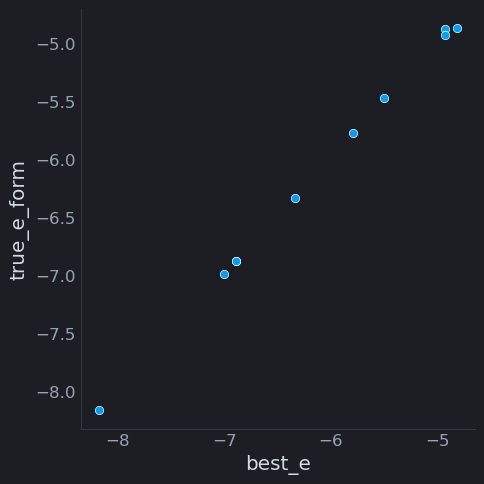

In [16]:
sns.relplot(df.eval('best_e = best_e_form / best_nsite'), x='best_e', y='true_e_form')